In [1]:
import numpy as np 
import pandas as po
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
emsemble_dapprentissage = po.read_csv('../../titanic/input/train.csv', index_col="PassengerId")
emsemble_test = po.read_csv("../../titanic/input/test.csv", index_col="PassengerId")

In [3]:
emsemble_dapprentissage['train_test'] = 1
emsemble_test['train_test'] = 0
emsemble_test['Survived'] = np.NaN
toutes_les_données= po.concat([emsemble_dapprentissage,emsemble_test])

%matplotlib inline
toutes_les_données.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [ ]:
emsemble_dapprentissage.info()

In [ ]:
emsemble_dapprentissage.describe()

In [6]:
emsemble_dapprentissage.describe().columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'train_test'], dtype='object')

In [7]:
chiffre = emsemble_dapprentissage[['Age','SibSp','Parch','Fare']]
categorie = emsemble_dapprentissage[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [ ]:
for i in chiffre.columns:
    plt.hist(chiffre[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

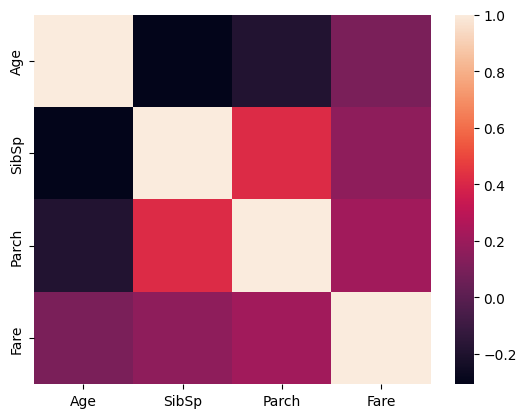

In [9]:
print(chiffre.corr())
sb.heatmap(chiffre.corr())

In [ ]:
po.pivot_table(emsemble_dapprentissage, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

In [ ]:
for i in categorie.columns:
    sb.barplot(x=categorie[i].value_counts().index,y=categorie[i].value_counts()).set_title(i)
    plt.show()

In [ ]:
print(po.pivot_table(emsemble_dapprentissage, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(po.pivot_table(emsemble_dapprentissage, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(po.pivot_table(emsemble_dapprentissage, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

In [ ]:
categorie.Cabin
emsemble_dapprentissage['cabin_multiple'] = emsemble_dapprentissage.Cabin.apply(lambda x: 0 if po.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
emsemble_dapprentissage['cabin_multiple'].value_counts()

In [ ]:
po.pivot_table(emsemble_dapprentissage, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

In [15]:
emsemble_dapprentissage['cabin_adv'] = emsemble_dapprentissage.Cabin.apply(lambda x: str(x)[0])

In [ ]:
#comparing surivial rate by cabin
print(emsemble_dapprentissage.cabin_adv.value_counts())
po.pivot_table(emsemble_dapprentissage,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

In [17]:
emsemble_dapprentissage['numeric_ticket'] = emsemble_dapprentissage.Ticket.apply(lambda x: "Chiffre" if x.isnumeric() else "Lettres")
emsemble_dapprentissage['ticket_letters'] = emsemble_dapprentissage.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [18]:
emsemble_dapprentissage['numeric_ticket'].value_counts()

numeric_ticket
Chiffre    661
Lettres    230
Name: count, dtype: int64

In [ ]:
#difference in numeric vs non-numeric tickets in survival rate 
po.pivot_table(emsemble_dapprentissage,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

In [ ]:
#ingénierie des fonctionnalités sur le titre de la personne
emsemble_dapprentissage.Name.head(50)
emsemble_dapprentissage['name_title'] = emsemble_dapprentissage.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
emsemble_dapprentissage['name_title'].value_counts()

In [21]:
#créer toutes les variables catégorielles que j'ai faites ci-dessus pour les ensembles de formation et de test
toutes_les_données['cabin_multiple'] = toutes_les_données.Cabin.apply(lambda x: 0 if po.isna(x) else len(x.split(' ')))
toutes_les_données['cabin_adv'] = toutes_les_données.Cabin.apply(lambda x: str(x)[0])
toutes_les_données['numeric_ticket'] = toutes_les_données.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
toutes_les_données['ticket_letters'] = toutes_les_données.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
toutes_les_données['name_title'] = toutes_les_données.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
#impute des valeurs nulles pour les données continues
toutes_les_données.Age = toutes_les_données.Age.fillna(emsemble_dapprentissage.Age.mean())
# toutes_les_données.Age = toutes_les_données.Age.fillna(emsemble_dapprentissage.Age.median())
#toutes_les_données.Fare = toutes_les_données.Fare.fillna(emsemble_dapprentissage.Fare.mean())
toutes_les_données.Fare = toutes_les_données.Fare.fillna(emsemble_dapprentissage.Fare.median())

In [ ]:
#drop les lignes nulles « embarquées ». Seulement 2 instances de cela en formation et 0 en test
toutes_les_données.dropna(subset=['Embarked'],inplace = True)

# log norm de la tarifaire
toutes_les_données['norm_fare'] = np.log(toutes_les_données.Fare+1)
toutes_les_données['norm_fare'].hist()

#tarif converti en catégorie pour po.get_dummies()
toutes_les_données.Pclass = toutes_les_données.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
toute_dummies = po.get_dummies(toutes_les_données[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [24]:
#Séparer pour s'entraîner à nouveau
X_entraîner = toute_dummies[toute_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = toute_dummies[toute_dummies.train_test == 0].drop(['train_test'], axis =1)


y_entraîner = toutes_les_données[toutes_les_données.train_test==1].Survived
y_entraîner.shape

(889,)

In [36]:
# Scale data 
scale = StandardScaler()
toute_dummies_scaled = toute_dummies.copy()
toute_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(toute_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
toute_dummies_scaled

X_entraîner_scaled = toute_dummies_scaled[toute_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = toute_dummies_scaled[toute_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_entraîner = toutes_les_données[toutes_les_données.train_test==1].Survived

# Création de modèles (performances de validation de base)
Avant d'aller plus loin, j'aime voir comment différents modèles fonctionnent avec les paramètres par défaut. J'ai essayé les modèles suivants en utilisant la validation croisée 5 fois pour obtenir une référence. Avec une base de référence définie par la validation, nous pouvons voir dans quelle mesure le réglage améliore chacun des modèles. Ce n'est pas parce qu'un modèle a une ligne de base élevée sur cet ensemble de validation qu'il fera mieux sur l'éventuel ensemble de test.

Bayes naïfs (72,6%)
Régression logistique (82,1%)
Arbre de décision (77,6 %)
K Voisin le plus proche (80,5 %)
Forêt aléatoire (80,6 %)
Classificateur de vecteurs de support (83,2 %)
Boost de dégradé Xtreme (81,8 %)
Classificateur de vote doux - Tous les modèles (82,8 %)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Bayes Naïfs 

In [80]:
#Utiliser Naive Bayes comme référence pour mes tâches de classification
gnb = GaussianNB()
cv = cross_val_score(gnb,X_entraîner_scaled,y_entraîner,cv=5)
res="{:.2%}".format(cv.mean())
liste=[]
liste.append({'Méthode':'Gaussian Bayes Naïfs','Précision':res})


## Régression logistique

In [81]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_entraîner,y_entraîner,cv=5)
#X scale
lr = LogisticRegression(max_iter = 2000)
cvs = cross_val_score(lr,X_entraîner_scaled,y_entraîner,cv=5)
res=max([cv.mean(),cvs.mean()])
res="{:.2%}".format(res)
liste.append({'Méthode':'Régression Logistique','Précision':res})


## Arbre de décision

In [82]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_entraîner,y_entraîner,cv=5)
#X scale
dt = tree.DecisionTreeClassifier(random_state = 1)
cvs = cross_val_score(dt,X_entraîner_scaled,y_entraîner,cv=5)

res=max([cv.mean(),cvs.mean()])
res="{:.2%}".format(res)
liste.append({'Méthode':'Arbre de Décision','Précision':res})

## K Plus Proche Voisin 

In [83]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_entraîner,y_entraîner,cv=5)
#X scale
knn = KNeighborsClassifier()
cvs = cross_val_score(knn,X_entraîner_scaled,y_entraîner,cv=5)

res=max([cv.mean(),cvs.mean()])
res="{:.2%}".format(res)
liste.append({'Méthode':'K Plus Proche Voisin','Précision':res})

## Forêt Aléatoire

In [84]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_entraîner,y_entraîner,cv=5)
#X scale
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_entraîner_scaled,y_entraîner,cv=5)

res=max([cv.mean(),cvs.mean()])
res="{:.2%}".format(res)
liste.append({'Méthode':'Forêt Aléatoire','Précision':res})

## Séparateurs à vaste Marge

In [85]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_entraîner,y_entraîner,cv=5)

res="{:.2%}".format(cv.mean())
liste.append({'Méthode':'Séparateurs à vaste Marge','Précision':res})

## Boost de dégradé Xtreme 

In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_entraîner_scaled,y_entraîner,cv=5)

res="{:.2%}".format(cv.mean())
liste.append({'Méthode':'Boost de dégradé Xtreme','Précision':res})

## Soft Voting Classifier
Le classificateur #Voting prend toutes les entrées et fait la moyenne des résultats. Pour un classificateur à vote « dur », chaque classificateur obtient 1 vote « oui » ou « non » et le résultat est simplement un vote populaire. Pour cela, vous voulez généralement des nombres impairs
#Un classificateur "doux" fait la moyenne de la confiance de chacun des modèles. Si le niveau de confiance moyen est > 50 % qu'il s'agit d'un 1, il sera compté comme tel.

In [77]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [87]:
cv = cross_val_score(voting_clf,X_entraîner_scaled,y_entraîner,cv=5)

res="{:.2%}".format(cv.mean())
liste.append({'Méthode':'Soft Voting Classifier','Précision':res})

In [92]:
voting_clf.fit(X_entraîner_scaled,y_entraîner)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': emsemble_test.index, 'Survived': y_hat_base_vc}
base_submission = po.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [94]:
tab=po.DataFrame(liste)
tab

,Méthode,Précision
0,Gaussian Bayes Naïfs,72.22%
1,Régression Logistique,82.12%
2,Arbre de Décision,77.62%
3,K Plus Proche Voisin,81.56%
4,Forêt Aléatoire,81.56%
5,Séparateurs à vaste Marge,72.56%
6,Boost de dégradé Xtreme,81.66%
7,Soft Voting Classifier,82.68%


# Performances Adaptées au Modèle
Après avoir obtenu les lignes de base, essayons d'améliorer les résultats du modèle individuel. Recherche de grille principalement utilisée pour affiner les modèles. La recherche aléatoire pour la forêt aléatoire et le modèle amélioré XG sont également utilisés pour simplifier le temps de test.

In [97]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [102]:
# fonction simple de rapport sur les performances
def clf_performance(classificateur, nom_du_modele):
    print(nom_du_modele)
    print('Meilleur score: ' + str(classificateur.best_score_))
    print('Meilleurs paramètres: ' + str(classificateur.best_params_))

    res="{:.2%}".format(classificateur.best_score_)
    liste.append({'Méthode':nom_du_modele,'Précision':res})

## Régression logistique

In [103]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_entraîner_scaled,y_entraîner)
liste=[]
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Meilleur score: 0.8268075922046594
Meilleurs paramètres: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


## K Plus Proche Voisin 

In [105]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_entraîner_scaled,y_entraîner)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Meilleur score: 0.8290484352186885
Meilleurs paramètres: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


## Forêt Aléatoire

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_entraîner_scaled,y_entraîner)
clf_performance(best_clf_rf,'Random Forest')

## Séparateurs à vaste Marge

In [108]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_entraîner_scaled,y_entraîner)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Meilleur score: 0.8324319177299563
Meilleurs paramètres: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


## Boost de dégradé Xtreme 

In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_entraîner_scaled,y_entraîner)
clf_performance(best_clf_xgb,'XGB')

y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_entraîner_scaled).astype(int)
xgb_submission = {'PassengerId': emsemble_test.index, 'Survived': y_hat_xgb}
submission_xgb = po.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

In [115]:
tab2=po.DataFrame(liste)
tab2

,Méthode,Précision
0,Logistic Regression,82.68%
1,KNN,82.90%
2,Random Forest,83.58%
3,SVC,83.24%
4,XGB,84.48%
5,XGB,84.48%


<Axes: >

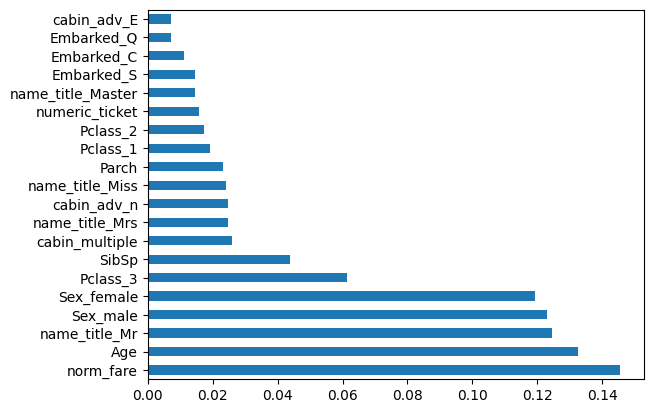

In [112]:
best_rf = best_clf_rf.best_estimator_.fit(X_entraîner_scaled,y_entraîner)
feat_importances = po.Series(best_rf.feature_importances_, index=X_entraîner_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Modéliser des approches d’ensemble supplémentaires

In [ ]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_entraîner_scaled,y_entraîner,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_entraîner_scaled,y_entraîner,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_entraîner_scaled,y_entraîner,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_entraîner_scaled,y_entraîner,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_entraîner_scaled,y_entraîner,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_entraîner_scaled,y_entraîner,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_entraîner_scaled,y_entraîner,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_entraîner_scaled,y_entraîner,cv=5).mean())

In [ ]:
#Dans un classificateur de vote doux, vous pouvez pondérer certains modèles plus que d'autres. J'ai utilisé une recherche 
#par grille pour explorer différentes pondérations pas de nouveaux résultats ici
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_entraîner_scaled,y_entraîner)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_entraîner_scaled)

In [ ]:
#Faire des prédictions
voting_clf_hard.fit(X_entraîner_scaled, y_entraîner)
voting_clf_soft.fit(X_entraîner_scaled, y_entraîner)
voting_clf_all.fit(X_entraîner_scaled, y_entraîner)
voting_clf_xgb.fit(X_entraîner_scaled, y_entraîner)

best_rf.fit(X_entraîner_scaled, y_entraîner)
y_hat_vc_hard = voting_clf_hard.predict(X_entraîner_scaled).astype(int)
y_hat_rf = best_rf.predict(X_entraîner_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_entraîner_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_entraîner_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_entraîner_scaled).astype(int)

In [ ]:
#convertir la sortie en dataframe
final_data = {'PassengerId': emsemble_test.PassengerId, 'Survived': y_hat_rf}
submission = po.DataFrame(data=final_data)

final_data_2 = {'PassengerId': emsemble_test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = po.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': emsemble_test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = po.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': emsemble_test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = po.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': emsemble_test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = po.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': emsemble_test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = po.DataFrame(data=final_data_comp)

In [ ]:
#suivre les différences entre les sorties 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [ ]:
comparison.difference_hard_all.value_counts()